In [1]:
from ase import Atoms
import numpy as np
import nglview as nv
from fireballpy import Fireball
import pandas as pd

atoms = Atoms('C2H2',
             positions=[(-0.601, 0.0, 0.0),
                        ( 0.601, 0.0, 0.0),
                        (-1.664, 0.0, 0.0),
                        ( 1.664, 0.0, 0.0)])

atoms.calc = Fireball(fdata='biology',
                      charges_method='mulliken_dipole_preserving')
etot = atoms.get_potential_energy()
print(f'E = {etot:.2f} eV')  

E = -337.25 eV


In [2]:
from fireballpy.orbitals import Fireball_Orbitals
orb = Fireball_Orbitals(fbobj=atoms.calc) 

#Rectangulo 
A = np.array([-2, -2, 0])   # 0,0
B = np.array([-2,  2, 0])   # 0,1
C = np.array([ 2,  2, 0])   # 1,1
D = np.array([ 2, -2, 0])   # 1,0

num_puntos=100

aux = orb.phi2D(A,B,C,D,num_puntos)
X, Y, phi, rho = aux['X'], aux['Y'], aux['phi'], aux['rho']

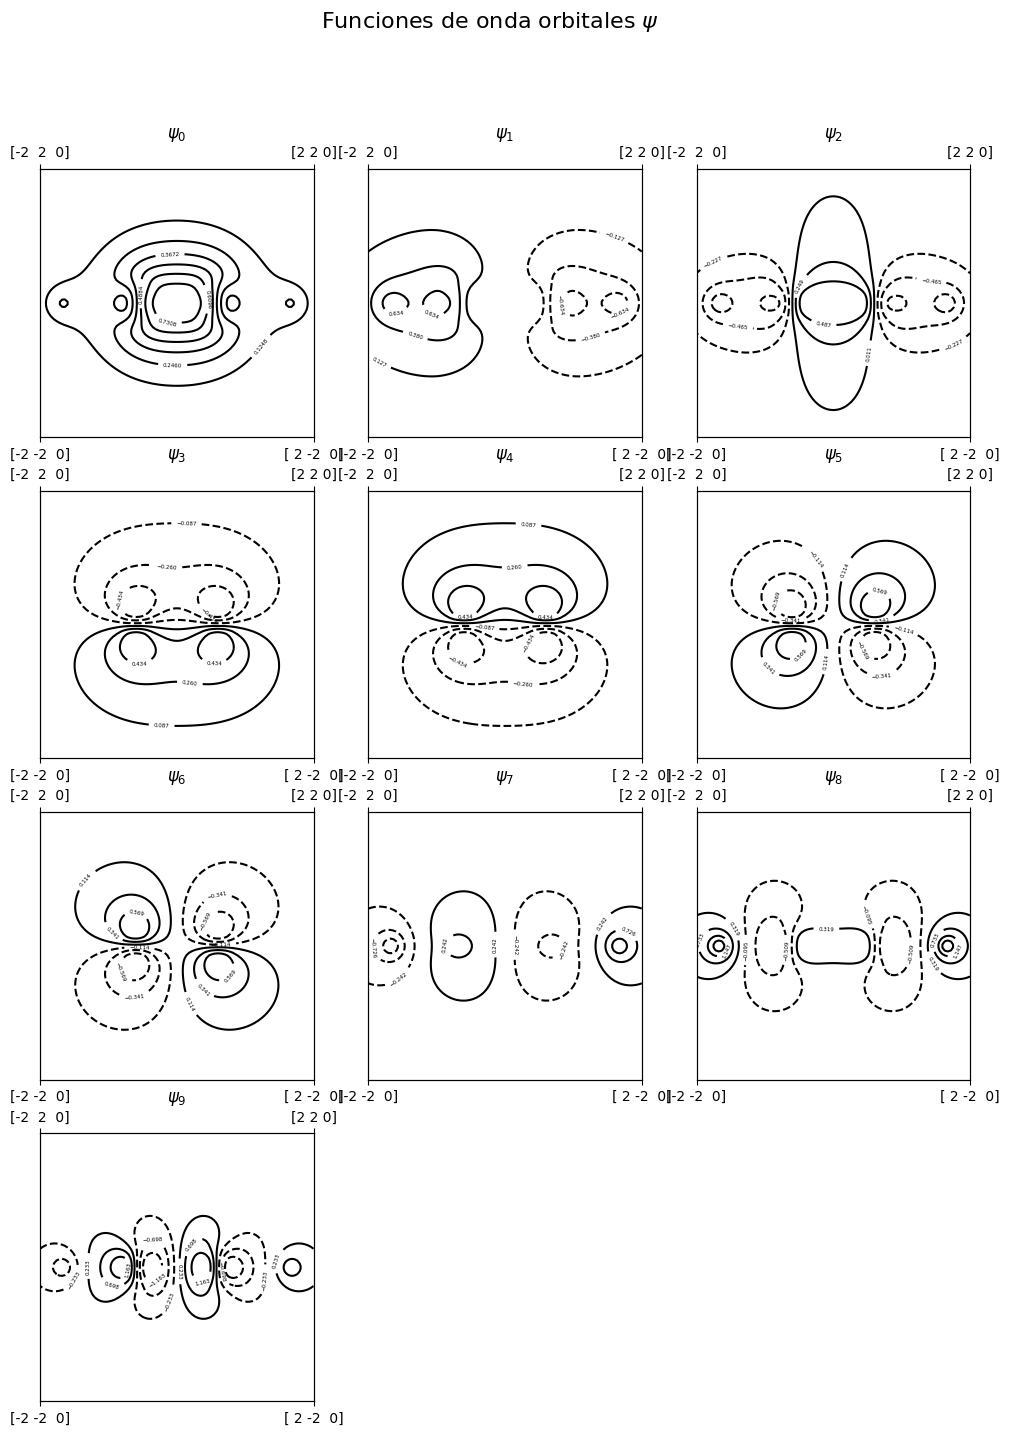

In [3]:
import matplotlib.pyplot as plt
n_orbitals = len(phi)  # Número de orbitales a graficar
n_rows = int(np.ceil(np.sqrt(n_orbitals)))  # Número de filas
n_cols = int(np.ceil(n_orbitals / n_rows))  # Número de columnas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 16))
fig.suptitle(rf'Funciones de onda orbitales $\psi$', fontsize=16)

# Graficar cada orbital en su subplot
for i, ax in enumerate(axes.flat):
    if i < n_orbitals:
        Z = phi[i]
        levels = np.linspace(Z.min(), Z.max(), 8)
        contours = ax.contour(X, Y, Z, levels=levels, colors='black')
        ax.clabel(contours, inline=True, fontsize=4)
        ax.set_title(rf'$\psi_{{\mathrm{{{i}}}}}$')
        ax.set_xticks([0, 1])  
        ax.set_xticklabels([f'{A}', f'{D}'])
        ax2 = ax.twiny()  
        ax2.xaxis.tick_top() 
        ax2.set_xticks([0,1])  
        ax2.set_xticklabels([f'{B}', f'{C}'])
        ax.set_yticks([])
        ax.grid(linestyle='--', alpha=0.3)
    else:
        ax.axis('off')  # Desactivar ejes si no hay suficientes orbitales

plt.tight_layout
plt.show()

In [4]:
fermi_level=0
for e in atoms.calc.eigenvalues[0]:
    if e < atoms.calc.get_fermi_level():
        fermi_level += 1
#    print(e ,atoms.calc.get_fermi_level(),fermi_level)

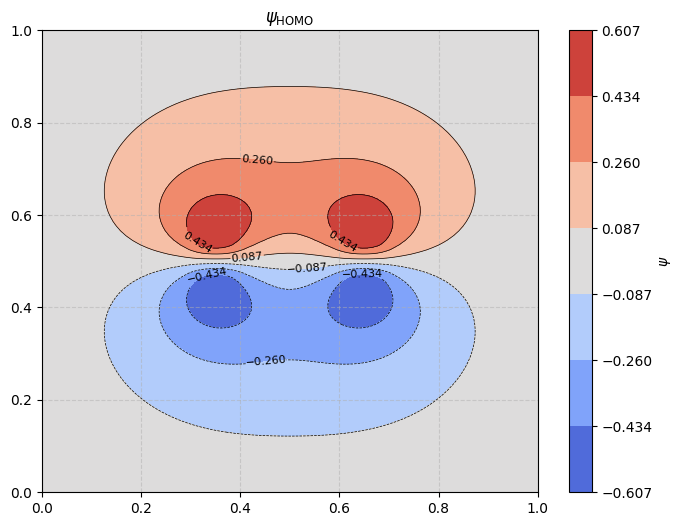

In [5]:
Z=phi[fermi_level-1]
plt.figure(figsize=(8, 6))
levels = np.linspace(Z.min(), Z.max(), 8) 
contourf_plot = plt.contourf(X, Y, Z, levels=levels, cmap='coolwarm')  
contours = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)  # Líneas negras delgadas
plt.clabel(contours, inline=True, fontsize=8)  
plt.colorbar(contourf_plot, label=r'$\psi$') 
plt.title(r'$\psi_{\mathrm{HOMO}}$')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

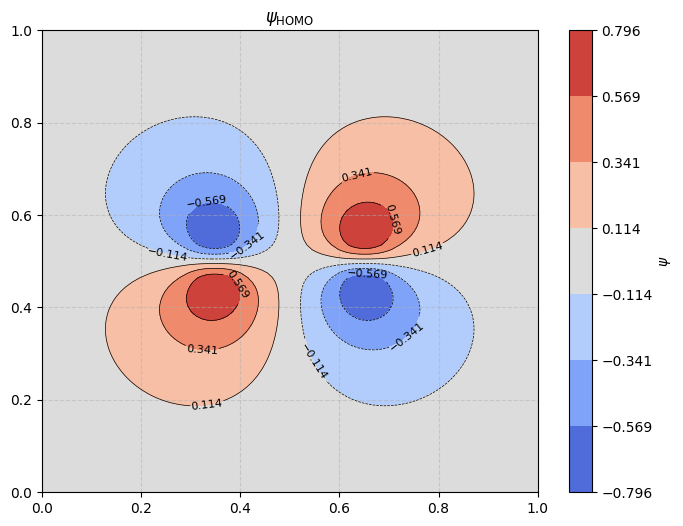

In [6]:
Z=phi[fermi_level]
plt.figure(figsize=(8, 6))
levels = np.linspace(Z.min(), Z.max(), 8) 
contourf_plot = plt.contourf(X, Y, Z, levels=levels, cmap='coolwarm')  
contours = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)  # Líneas negras delgadas
plt.clabel(contours, inline=True, fontsize=8)  
plt.colorbar(contourf_plot, label=r'$\psi$') 
plt.title(r'$\psi_{\mathrm{HOMO}}$')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

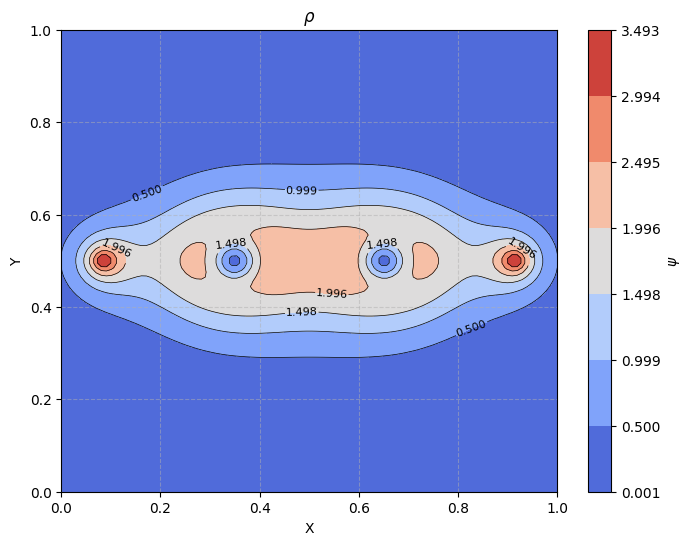

In [7]:
Z=rho
plt.figure(figsize=(8, 6))
levels = np.linspace(Z.min(), Z.max(), 8) 
contourf_plot = plt.contourf(X, Y, Z, levels=levels, cmap='coolwarm')  
contours = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)  # Líneas negras delgadas
plt.clabel(contours, inline=True, fontsize=8)  
plt.colorbar(contourf_plot, label=r'$\psi$') 
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'$\rho$')
plt.grid(linestyle='--', alpha=0.5)
plt.show()